# Chile Wildfire Hotspots Dataset

Chile Hotspots

Libraries we need are imported first

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

Data used in this exercise is stored in the DATA folder

In [6]:
data = '../../../DATA/chile_fire_cluster_sequence_v2.json'

The dataframe is created using the .read_csv function of Pandas

In [9]:
hotspot = pd.read_json(data)

The original CSV file is structured as a dataframe with the corresponding categories

In [12]:
hotspot = hotspot[hotspot['mir_bt'].notna()]
hotspot = hotspot[hotspot['frp'].notna()]

After renaming the variable of the dataframe, we use .describe() to see essential statistics for each variable

## Scatter Plots

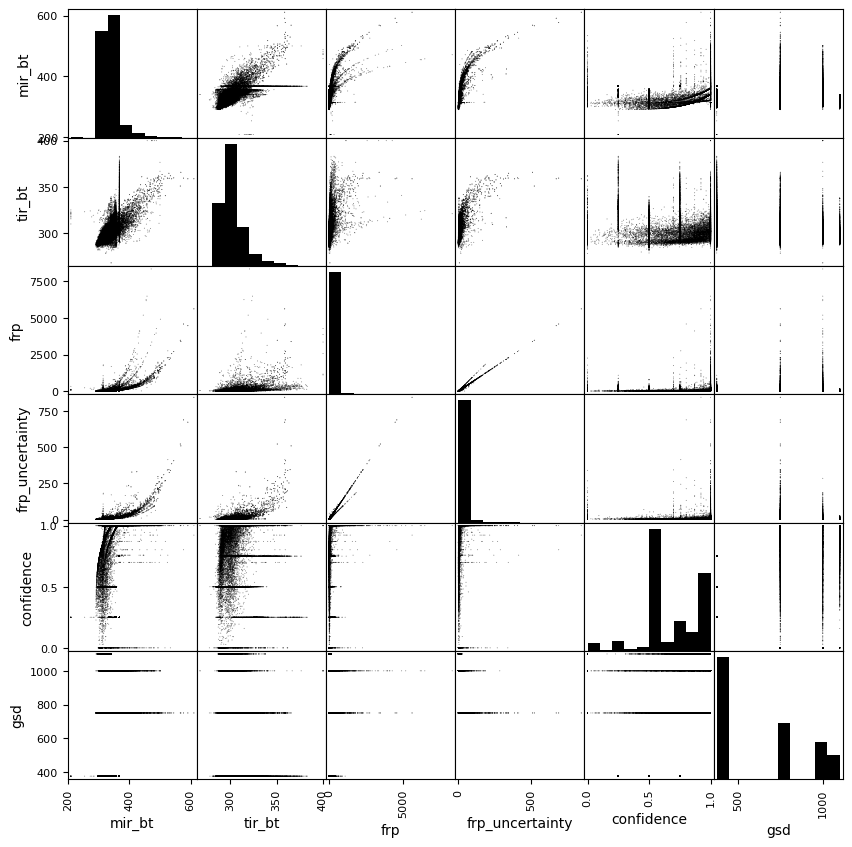

In [22]:
fig, ax = pl.subplots(figsize=(10, 10)) 
ax = pd.plotting.scatter_matrix(hotspot[['mir_bt', 'tir_bt', 'frp','frp_uncertainty','confidence','gsd']],ax=ax,s=2,c='k',hist_kwds={'color':['black']});

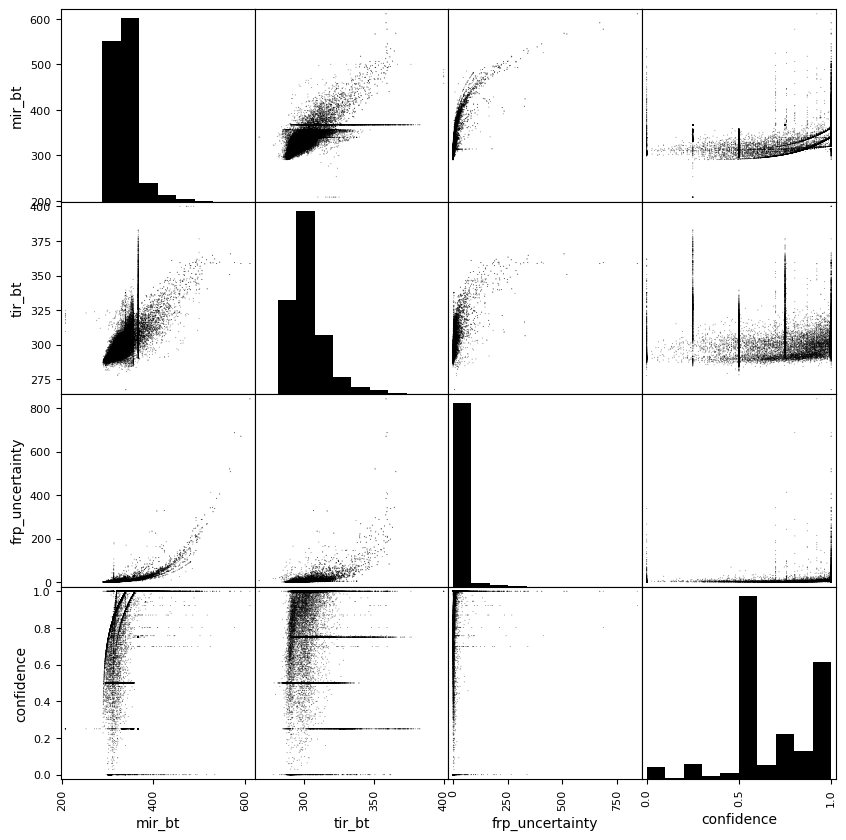

In [18]:
fig, ax = pl.subplots(figsize=(10, 10)) 
ax = pd.plotting.scatter_matrix(hotspot[['mir_bt', 'tir_bt', 'frp_uncertainty','confidence']],ax=ax,s=2,c='k',hist_kwds={'color':['black']});

In [72]:
sats = hotspot['satellite'].unique().tolist()
sats

['SUOMI-NPP',
 'NOAA-20',
 'MetOp-C',
 'AQUA',
 'MetOp-B',
 'TERRA',
 'SENTINEL-3B',
 'SENTINEL-3A']

In [88]:
sat_stat = hotspot['satellite'].value_counts()
sat_stat

satellite
SUOMI-NPP      10695
NOAA-20        10155
MetOp-B         1438
MetOp-C         1435
SENTINEL-3B     1371
TERRA           1173
AQUA            1024
SENTINEL-3A      827
Name: count, dtype: int64

In [80]:
algos = hotspot['algorithm'].unique().tolist()
algos

['VIIRS-Active-Fire-Product',
 'OT-S',
 'OT-V',
 'MODIS-Collection6-Active-Fire-Product',
 'SENTINEL-FRP']

In [96]:
colors_sat = ['red','blue','cyan','yellow','black','green','magenta','grey']
mapped = dict(zip(sats,colors_sat))
mapped
# colors = {'D':'tab:blue', 'E':'tab:orange', 'F':'tab:green', 'G':'tab:red', 'H':'tab:purple', 'I':'tab:brown', 'J':'tab:pink'}

{'SUOMI-NPP': 'red',
 'NOAA-20': 'blue',
 'MetOp-C': 'cyan',
 'AQUA': 'yellow',
 'MetOp-B': 'black',
 'TERRA': 'green',
 'SENTINEL-3B': 'magenta',
 'SENTINEL-3A': 'grey'}

In [98]:
colors_algo = ['red','blue','cyan','yellow','black']
mapped_algo = dict(zip(algos,colors_algo))
mapped_algo

{'VIIRS-Active-Fire-Product': 'red',
 'OT-S': 'blue',
 'OT-V': 'cyan',
 'MODIS-Collection6-Active-Fire-Product': 'yellow',
 'SENTINEL-FRP': 'black'}

In [100]:
X = hotspot[['mir_bt']]
Y = hotspot[['frp']]

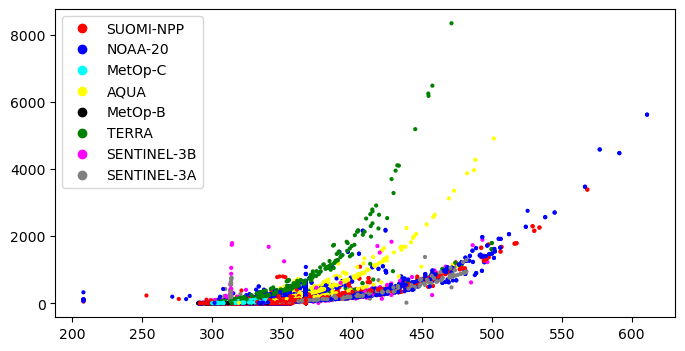

In [108]:
fig, ax = pl.subplots(figsize=(8, 4)) 
# gsd = pl.scatter(X, Y, c =hotspot['gsd'],cmap='viridis', s=4)
gsd = pl.scatter(X, Y, c =hotspot['satellite'].map(mapped), s=4)
# cbar = pl.colorbar(gsd, ax=ax, shrink=.5, pad=.02, aspect=10)
handlelist = [pl.plot([], marker="o", ls="", color=color)[0] for color in colors_sat]
pl.legend(handlelist,sats,loc='upper left')

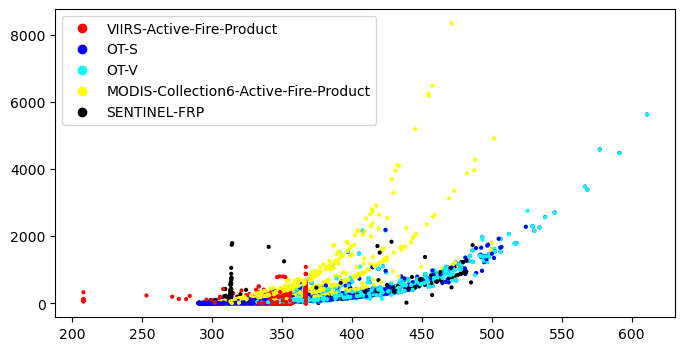

In [112]:
fig, ax = pl.subplots(figsize=(8, 4)) 
# gsd = pl.scatter(X, Y, c =hotspot['gsd'],cmap='viridis', s=4)
gsd = pl.scatter(X, Y, c =hotspot['algorithm'].map(mapped_algo), s=4)
# cbar = pl.colorbar(gsd, ax=ax, shrink=.5, pad=.02, aspect=10)
handlelist = [pl.plot([], marker="o", ls="", color=color)[0] for color in colors_sat]
pl.legend(handlelist,algos,loc='upper left')

## Box Plots

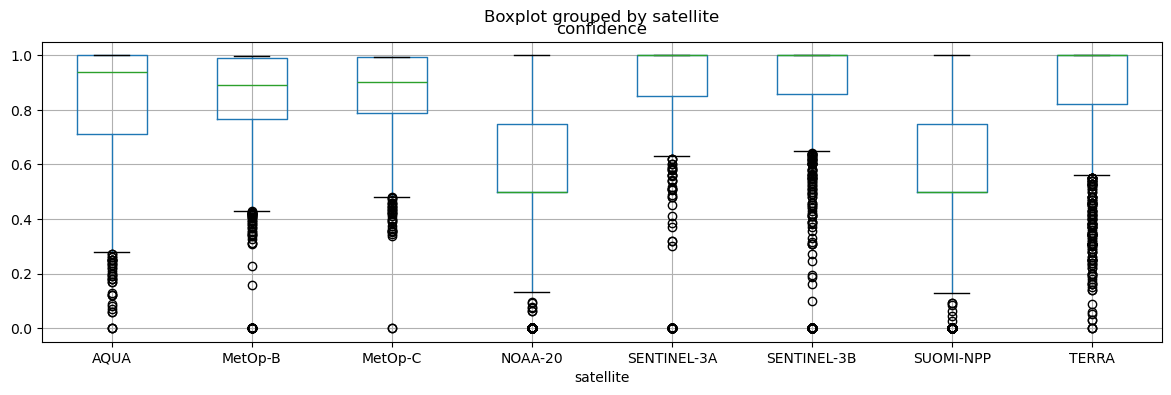

In [43]:

fig, ax = pl.subplots(figsize=(14, 4)) 
hotspot.boxplot('confidence', by='satellite', ax=ax);

In [52]:
X = hotspot[['mir_bt']]
Y = hotspot[['frp']]

## Simple Linear Regression

In [55]:
reg = LinearRegression().fit(X, Y)

In [57]:
reg.coef_

array([[4.68961413]])

In [59]:
reg.intercept_

array([-1511.6432085])

In [61]:
y_pred = reg.predict(X)

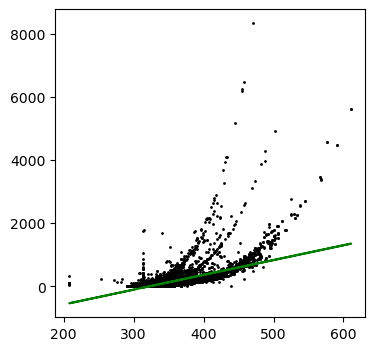

In [63]:
fig, ax = pl.subplots(figsize=(4, 4)) 
ax = pl.scatter(X, Y, color = 'k', s=1)
ax = pl.plot(X, reg.predict(X), color = 'g')